## Импортируем нужные библиотеки

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
import seaborn as sns
from numpy.linalg import svd

## Считываем очищенные от лишней информации датасеты и объедененный датасет

In [432]:
sheet_joined = pd.read_excel("clean_joined.xlsx", sheet_name=0, index_col=0)
sheet_joined_cutoff = pd.read_excel("clean_joined_cutoff.xlsx", sheet_name=0, index_col=0)

## Применяем МГК

In [433]:
n_comp = 2
pca = PCA(n_components=n_comp)

In [434]:
pca.fit(sheet_joined)

PCA(n_components=2)

In [435]:
transformed_joined = pca.transform(sheet_joined)

In [436]:
transformed_joined[:10]

array([[-123.23513302,    1.53928913],
       [ -60.11642204,   16.64336107],
       [-204.58894327,   -3.20480501],
       [ -86.24523388,  -16.82728194],
       [-188.39762025,   -4.3040104 ],
       [-151.46841413,    4.1445747 ],
       [-230.87958675,   -3.32280025],
       [-222.95797761,   -3.32237075],
       [-177.75207393,   -7.19491622],
       [-151.59266909,  -11.64327682]])

In [437]:
n_comp = 2
pca_cutoff = PCA(n_components=n_comp)

In [438]:
pca_cutoff.fit(sheet_joined_cutoff)

PCA(n_components=2)

In [439]:
transformed_joined_cutoff = pca_cutoff.transform(sheet_joined_cutoff)

In [440]:
transformed_joined_cutoff[:10]

array([[ -8.40284094,  -1.04941572],
       [ 11.77463702,  -5.38020972],
       [-19.70673557,  -0.0876861 ],
       [-23.73701268,   0.59530818],
       [-19.49572584,  -0.05134016],
       [ -8.08246338,  -1.63013743],
       [-21.95601701,   0.93817747],
       [-21.31507193,   0.78034702],
       [-21.52169888,   0.44894385],
       [-23.84384834,   0.50735634]])

## Реализуем МГК через сингулярное разложение

### Нормализуем

In [441]:
X_ = sheet_joined - sheet_joined.mean(axis=0)

In [442]:
X_.dot(pca.components_.T)

,0,1
probe,,
03В,-123.235133,1.539289
04В,-60.116422,16.643361
05В,-204.588943,-3.204805
06В,-86.245234,-16.827282
08В,-188.397620,-4.304010
...,...,...
17-12,-32.565031,35.745840
17-18,-124.804616,31.521027
17-19,1614.613636,286.403837


### Полное сингулярное разложение

In [443]:
u, s, vt = svd(X_, full_matrices=0)

In [444]:
u.shape

(64, 11)

In [445]:
s.shape

(11,)

In [446]:
vt.shape

(11, 11)

### Проверим разложение, матрица должна восстановиться

In [447]:
S = np.diag(s)

In [448]:
X_svd = u.dot(S).dot(vt)

In [449]:
((X_svd - X_)**2).sum()

CH4         1.075098e-24
C2H6        1.963317e-26
C2H4        6.434483e-27
C3H8        7.006831e-26
C3H6        7.214657e-28
 i-C4H10    1.133271e-27
n-C4H10     7.482120e-26
C4H8        1.304829e-27
i-C4H8      1.443514e-28
i-C5H12     2.775254e-26
n-C5H12     6.583693e-28
dtype: float64

### Матрица главных компонент

In [450]:
pca.components_

array([[ 0.99673455,  0.06767148,  0.00764061,  0.03794783,  0.01162612,
         0.00303367,  0.01559891,  0.00396765,  0.00210086,  0.00398128,
         0.0043225 ],
       [-0.08071929,  0.82560626,  0.09036786,  0.48178176,  0.14027508,
         0.0373785 ,  0.20340489,  0.04618183,  0.02093203,  0.0646274 ,
         0.04881884]])

In [451]:
vt

array([[ 9.96734552e-01,  6.76714796e-02,  7.64060862e-03,
         3.79478273e-02,  1.16261242e-02,  3.03366520e-03,
         1.55989135e-02,  3.96765270e-03,  2.10085985e-03,
         3.98128180e-03,  4.32250241e-03],
       [-8.07192908e-02,  8.25606257e-01,  9.03678564e-02,
         4.81781761e-01,  1.40275077e-01,  3.73784963e-02,
         2.03404890e-01,  4.61818334e-02,  2.09320327e-02,
         6.46273986e-02,  4.88188379e-02],
       [-1.98528594e-03,  4.43013056e-01,  1.51748264e-01,
        -5.08156840e-01,  8.50335958e-02, -7.60849938e-02,
        -5.88695187e-01,  5.70424903e-02, -4.72936168e-03,
        -3.99117776e-01, -1.82128628e-02],
       [-6.77113352e-04, -1.68119157e-01,  2.64444738e-01,
         4.99014312e-02,  2.55806581e-01,  7.75891142e-02,
         1.80251568e-01,  2.99539518e-01,  7.43288444e-01,
        -3.49765107e-01,  1.75582883e-01],
       [ 3.72872715e-04,  9.37962007e-02,  5.26668444e-02,
        -1.06071369e-01, -1.02625130e-01, -7.41963284e-02,
  

In [452]:
v = vt[:2].T

In [453]:
Z_svd = X_.dot(v)

In [454]:
Z_svd[:100]

,0,1
probe,,
03В,-123.235133,1.539289
04В,-60.116422,16.643361
05В,-204.588943,-3.204805
06В,-86.245234,-16.827282
08В,-188.397620,-4.304010
...,...,...
17-12,-32.565031,35.745840
17-18,-124.804616,31.521027
17-19,1614.613636,286.403837


In [456]:
transformed_joined[:10]

array([[-123.23513302,    1.53928913],
       [ -60.11642204,   16.64336107],
       [-204.58894327,   -3.20480501],
       [ -86.24523388,  -16.82728194],
       [-188.39762025,   -4.3040104 ],
       [-151.46841413,    4.1445747 ],
       [-230.87958675,   -3.32280025],
       [-222.95797761,   -3.32237075],
       [-177.75207393,   -7.19491622],
       [-151.59266909,  -11.64327682]])

### Доля объсненной дисперсии каждой из 

In [457]:
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(n_comp)], index=sheet_joined.columns)

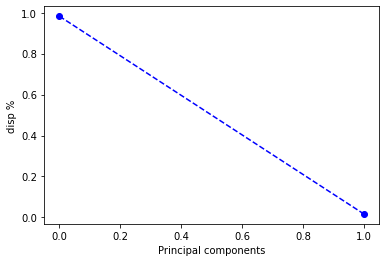

In [458]:
plt.plot(pca.explained_variance_ratio_, 'b--o')
plt.xlabel("Principal components")
plt.ylabel("disp %")
plt.savefig("disp.png")

In [459]:
loadings = pd.DataFrame(pca_cutoff.components_.T, columns=[f"PC{i+1}" for i in range(n_comp)], index=sheet_joined_cutoff.columns)

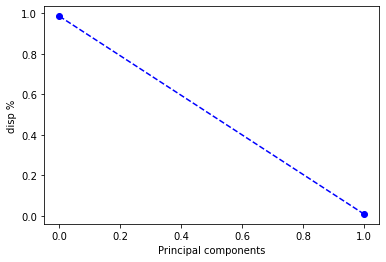

In [460]:
plt.plot(pca_cutoff.explained_variance_ratio_, 'b--o')
plt.xlabel("Principal components")
plt.ylabel("disp %")
plt.savefig("disp_cutoff.png")

Text(0, 0.5, 'PC2')

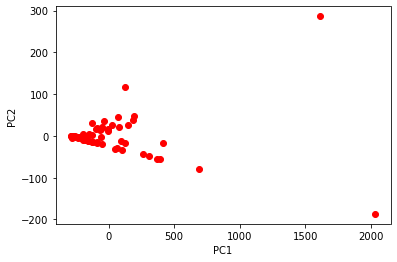

In [418]:
plt.plot(transformed_joined[:,0],transformed_joined[:,1], 'ro')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

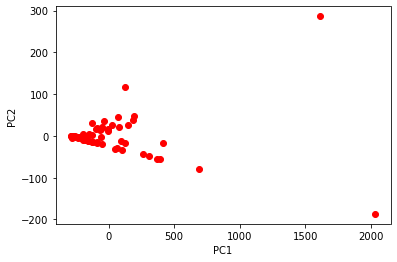

In [419]:
plt.plot(np.array(Z_svd)[:,0],np.array(Z_svd)[:,1], 'ro')
plt.xlabel("PC1")
plt.ylabel("PC2")

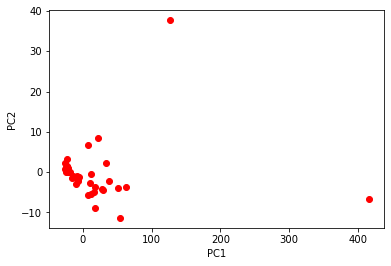

In [461]:
plt.plot(transformed_joined_cutoff[:,0],transformed_joined_cutoff[:,1], 'ro')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("out_cutoff.png")

### Кластеризуем с помощью k-means и DBSCAN

In [462]:
kmeans_transformed_joined = KMeans(n_clusters=2, random_state=0).fit_predict(transformed_joined)

In [463]:
dbscan_transformed_joined = DBSCAN(eps = 0.8, min_samples=3).fit_predict(transformed_joined)

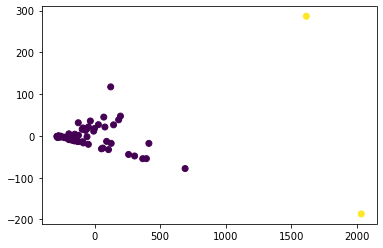

In [464]:
plt.scatter(transformed_joined[:,0],transformed_joined[:,1], c = kmeans_transformed_joined)

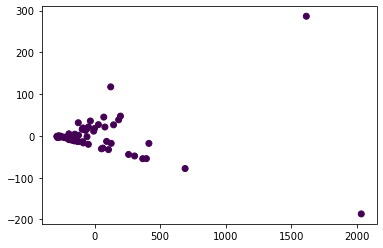

In [465]:
plt.scatter(transformed_joined[:,0],transformed_joined[:,1], c = dbscan_transformed_joined)

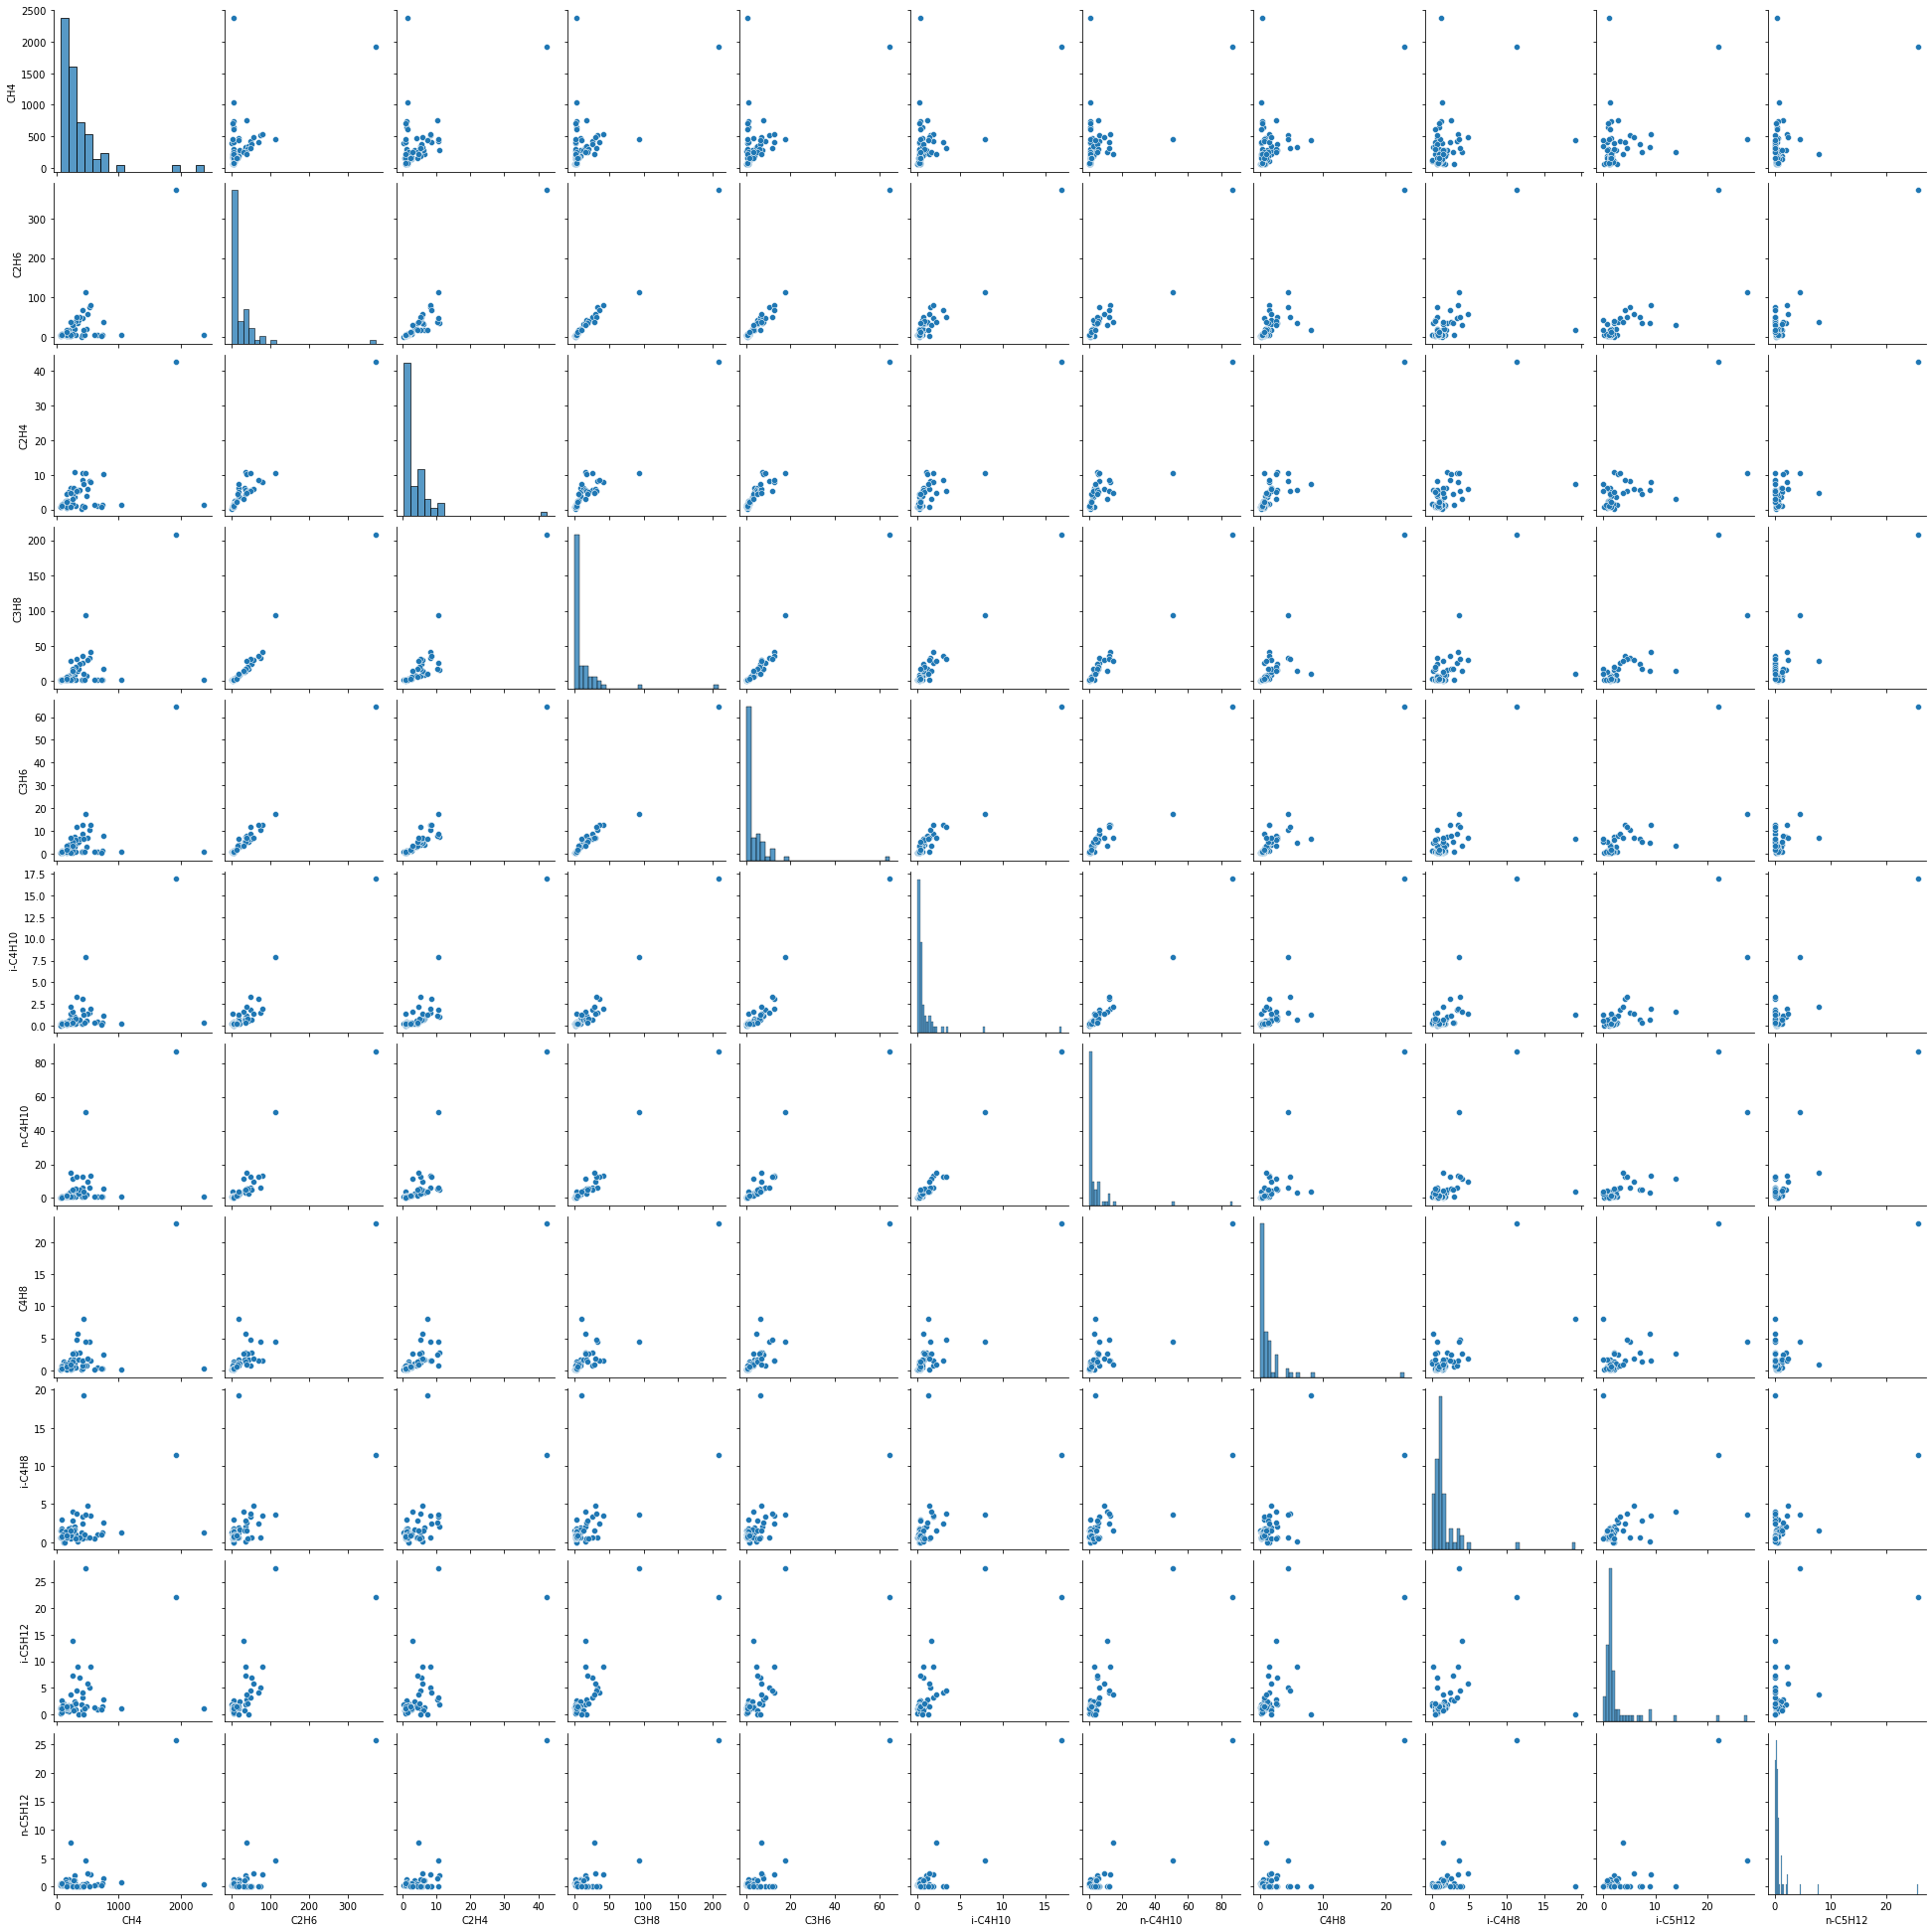

In [212]:
sns_plot = sns.pairplot(pd.DataFrame(sheet_joined))

In [350]:
sns_plot.savefig("data_disp.png")

In [466]:
kmeans_transformed_joined_cutoff = KMeans(n_clusters=2, random_state=0).fit_predict(transformed_joined_cutoff)

In [467]:
dbscan_transformed_joined_cutoff = DBSCAN(eps = 0.8, min_samples=3).fit_predict(transformed_joined_cutoff)

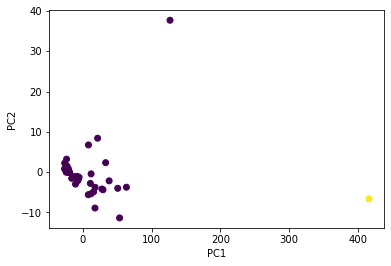

In [471]:
plt.scatter(transformed_joined_cutoff[:,0],transformed_joined_cutoff[:,1], c = kmeans_transformed_joined_cutoff)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("kmeans_cutoff.png")

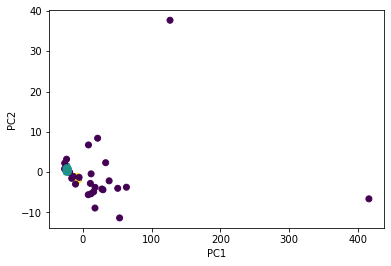

In [472]:
plt.scatter(transformed_joined_cutoff[:,0],transformed_joined_cutoff[:,1], c = dbscan_transformed_joined_cutoff)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("dbscan_cutoff.png")

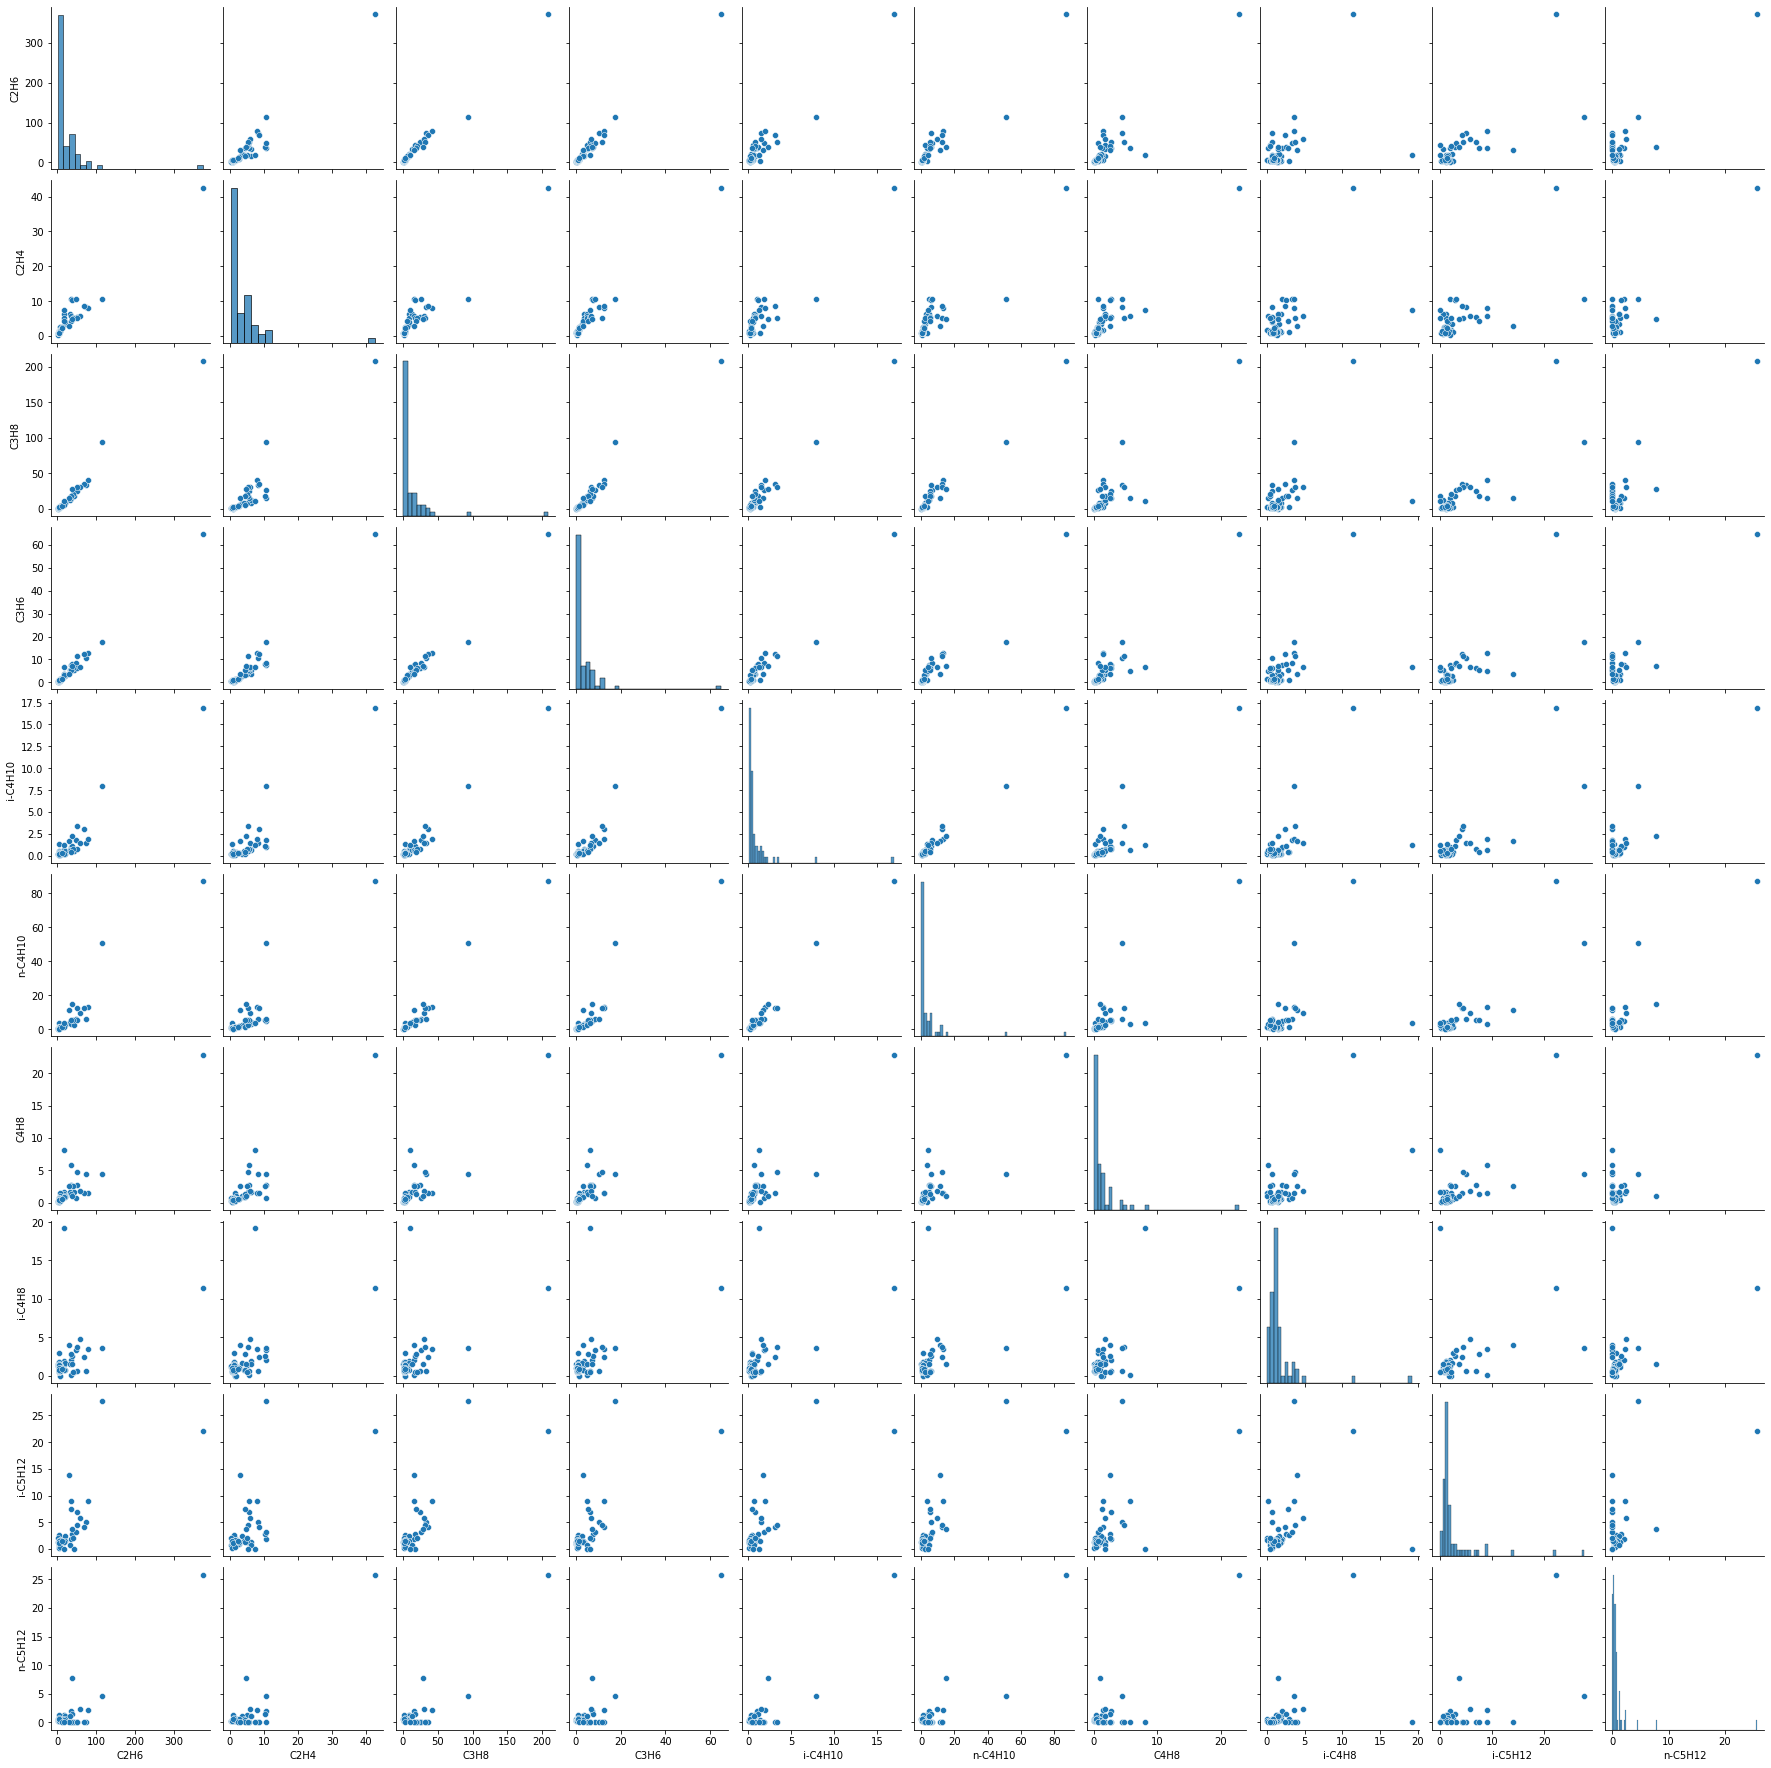

In [470]:
sns.pairplot(pd.DataFrame(sheet_joined_cutoff))

In [473]:
sns_plot.savefig("data_disp_cutoff.png")